In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

LOAD THE DATA AND ACC DATA

In [2]:
data = np.load('X_30.npz')
# acc_data = np.load('X_30_acc.npz')

t = data['timestamp']

x = data['data']
# x_acc = acc_data['acc_data']

In [4]:
# Assuming 'data' is your array of shape (x, 3, 150)
X_acc = x_acc.reshape(x_acc.shape[0], -1)  # Reshape to (x, 450)
X_acc.shape

(86400, 450)

In [5]:
# Scale the data
scaler = StandardScaler()
X_acc_scaled = scaler.fit_transform(X_acc)  # Standardize the data to have mean=0, variance=1

DBSCAN

In [6]:
# DBSCAN parameters
eps = 0.5  # You can tune this based on your data
min_samples = 5  # The minimum number of points to form a cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_acc_scaled)

# 'labels' will contain the cluster labels, with -1 indicating noise points

In [7]:
# Count the number of noise points (-1 indicates noise)
num_noise = np.sum(labels == -1)
print(f'Number of noise points: {num_noise}')

Number of noise points: 86400


In [9]:
# Apply t-SNE to reduce the dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_acc_scaled)

# Plot the t-SNE results, coloring by DBSCAN labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar()  # Show the cluster labels as colors
plt.title('t-SNE visualization of DBSCAN clusters')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Find the distances to the nearest neighbors (for k-distance plot)
k = 4  # Number of nearest neighbors (min_samples typically starts here)
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_acc_scaled)
distances, indices = neighbors_fit.kneighbors(X_acc_scaled)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.title('K-distance graph for DBSCAN')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

KMEANS

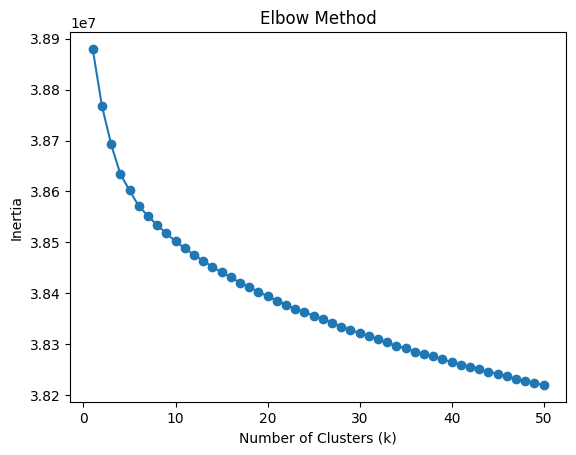

In [13]:
inertia = []
for k in range(1, 51):  # Try different k values (1 to 10 clusters)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_acc_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 51), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

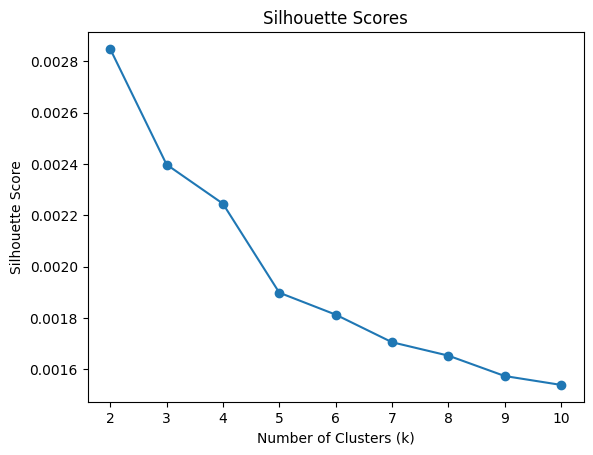

In [16]:
silhouette_scores = []
for k in range(2, 11):  # Starting from k=2 (since silhouette score can't be computed for k=1)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_acc_scaled)
    score = silhouette_score(X_acc_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
# Assuming you've chosen k = 4 (as an example)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_acc_scaled)

# Get the cluster labels for each sample
labels = kmeans.labels_

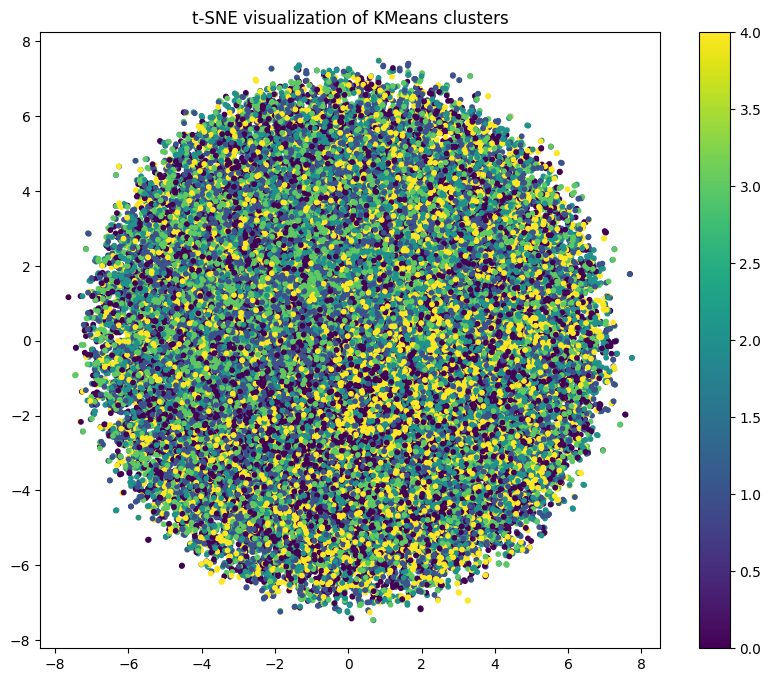

In [18]:
# Apply t-SNE to reduce the dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_acc_scaled)

# Plot the t-SNE results, coloring by KMeans labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar()  # Show the cluster labels as colors
plt.title('t-SNE visualization of KMeans clusters')
plt.show()

In [19]:
print("Cluster centers (450-dimensional):")
print(kmeans.cluster_centers_)

# If needed, you can map these centers back to a 3-channel (150 data points) format for interpretation
cluster_centers_reshaped = kmeans.cluster_centers_.reshape(k, 3, 150)
print("Cluster centers reshaped to (k, 3, 150):")
print(cluster_centers_reshaped)

Cluster centers (450-dimensional):
[[ 0.07529197 -0.10179919  0.05821862 ... -0.01511552  0.0643422
  -0.03159496]
 [-0.06343709  0.04344816 -0.07079395 ...  0.13595342 -0.13490236
   0.15578685]
 [-0.01345789  0.01644359 -0.04666233 ... -0.07470892  0.07566509
  -0.08897805]
 [-0.11017125  0.15375679 -0.08095844 ... -0.08098931  0.02730343
  -0.07437486]
 [ 0.10799706 -0.10141073  0.14467094 ...  0.02974703 -0.03586751
   0.03619393]]
Cluster centers reshaped to (k, 3, 150):
[[[ 0.07529197 -0.10179919  0.05821862 ... -0.0851177   0.08026185
   -0.12219877]
  [-0.11720031  0.09729759 -0.10127791 ...  0.1165397  -0.11942091
    0.08312174]
  [ 0.04203477 -0.06640201  0.04363968 ... -0.01511552  0.0643422
   -0.03159496]]

 [[-0.06343709  0.04344816 -0.07079395 ...  0.07269623 -0.04553156
    0.07799442]
  [-0.01360313  0.00502335 -0.00691487 ...  0.0316883  -0.02210813
    0.00621557]
  [-0.14138944  0.15013091 -0.1164028  ...  0.13595342 -0.13490236
    0.15578685]]

 [[-0.01345789  0.

RANDOM LABELS TO EACH SEQUENCE

In [3]:
# Define your 4 labels (you can customize this as needed)
labels = ["standing", "sitting", "walking", "running"]

# Generate random labels for each sequence
# data.shape[0] gives the number of sequences, which is 25256 in your case
random_labels = np.random.choice(labels, size=x.shape[0])

# Now `random_labels` is an array of size (25256,) with random labels for each sequence
np.savez('Y.npz', y=random_labels)

In [4]:
y = np.load("Y.npz")
y = y['y']

In [5]:
y.shape

(86400,)

In [6]:
y[0:5]

array(['walking', 'running', 'running', 'sitting', 'walking'], dtype='<U8')

Clustering per class (MAIN CODE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [ ]:
class KMeansEvaluator:
    def __init__(self, data, n_clusters, cluster_colors, true_labels=None):
        """
        Initializes the KMeansEvaluator class.
        
        Parameters:
        - data: The data to cluster (should be in 2D array-like format).
        - n_clusters: The number of clusters for KMeans.
        - true_labels: Optional. True labels of the data to calculate cluster purity.
        """
        self.data = data
        self.n_clusters = n_clusters
        self.colors = cluster_colors
        self.true_labels = true_labels
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        
    def fit(self):
        """Fits the KMeans model and stores the results."""
        # Step 1: Standardize the features
        self.data_scaled = self.scaler.fit_transform(self.data)
        
        # Step 2: Apply t-SNE for dimensionality reduction
        tsne = TSNE(n_components=2, random_state=42)
        self.data_tsne = tsne.fit_transform(self.data_scaled)
        
        # Step 3: Fit KMeans clustering
        self.cluster_labels = self.kmeans.fit_predict(self.data_tsne)
        self.centroids = self.kmeans.cluster_centers_
        
    def evaluate(self):
        """Evaluates the KMeans clustering performance."""
        # Inertia (within-cluster sum of squares)
        inertia = self.kmeans.inertia_
        
        # Silhouette Score
        silhouette = silhouette_score(self.data_tsne, self.cluster_labels)
        
        # Purity (if true labels are provided)
        if self.true_labels is not None:
            # Compute purity
            contingency_matrix = np.zeros((self.n_clusters, len(np.unique(self.true_labels))))
            for i in range(len(self.data)):
                contingency_matrix[self.cluster_labels[i], self.true_labels[i]] += 1
            purity = np.sum(np.max(contingency_matrix, axis=1)) / len(self.data)
        else:
            purity = None
        
        return inertia, silhouette, purity
    
    def plot_clusters(self):
        """Plots the t-SNE results with clusters and circles."""
        plt.figure(figsize=(12, 8))
        
        # Plot clusters with their assigned colors
        for i in range(self.n_clusters):
            cluster_points = self.data_tsne[self.cluster_labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        color=self.colors[i])
            
            # Create and plot the circle around the cluster
            cluster_center = np.mean(cluster_points, axis=0)
            cluster_radius = np.max(np.linalg.norm(cluster_points - cluster_center, axis=1))
            circle = plt.Circle((cluster_center[0], cluster_center[1]), cluster_radius, 
                                color=self.colors[i], fill=False, linestyle='--', linewidth=2)
            plt.gca().add_patch(circle)
        
        # Plot centroids on top of the points
        for i, centroid in enumerate(self.centroids):
            plt.scatter(centroid[0], centroid[1], 
                        s=300, c=self.colors[i], marker='X', 
                        edgecolors='white', linewidth=2, zorder=10, label=f"Centroid {i}")
            
        # Overlay original labels with the same cluster colors
        for label in np.unique(self.true_labels):
            label_points = self.data_tsne[self.true_labels == label]
            plt.scatter(label_points[:, 0], label_points[:, 1], 
                        edgecolors='k', facecolors=self.colors[label], 
                        s=50, label=f"Class {label}")
        
        plt.title("t-SNE with Clusters and Centroids with Circles")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.show()

In [ ]:
# Example usage:
# Generate some sample data
data = np.random.rand(3485, 3)  # Example data with 3 features
labels = np.random.randint(0, 4, size=3485)  # Example true labels (4 classes)

cluster_colors = {0: 'red', 
                1: 'blue', 
                2: 'green', 
                3: 'purple'}

# Instantiate the evaluator
evaluator = KMeansEvaluator(data, n_clusters=4, cluster_colors=cluster_colors, true_labels=labels)

# Fit the model
evaluator.fit()

# Evaluate the model
inertia, silhouette, purity = evaluator.evaluate()
print("Inertia:", inertia)
print("Silhouette Score:", silhouette)
if purity is not None:
    print("Purity:", purity)

# Plot the clusters
evaluator.plot_clusters()
